This is the code I use to visualize the data from seqNMF. I already finished running the seqNMF on a windows machine and decide to display the result here.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# This is the path for the matrix W and matrix H.
# You should already quite familiar with these two matrxies now!

matrix_w_path = 'matrix_w.npy'
matrix_h_path = 'matrix_h.npy'

In [ ]:
# Since I want the background to be nan when displaying the data, and 0 while calculating seqNMF.
# So I store the background inedx in this npy

non_nan_pos_path = 'notnan.npy'
non_nan_pos_list = np.load(non_nan_pos_path)

In [ ]:
# print(non_nan_pos_list.shape)

(25310,)


In [ ]:
# load the matrix W and matrix H

matrix_w = np.load(matrix_w_path)
matrix_h = np.load(matrix_h_path)

In [ ]:
# This indicates that there are in total 34200 pixels, and 10 motifs are found among the pixels.
# Each motif last for about 20 frames. In total 8000 frames are included inside the seqnmf.
# W contains all 10 motifs.
# The size of image is 171*200 = 34200

# print(matrix_w.shape)
# print(matrix_h.shape)

(34200, 10, 20)
(10, 8000)


In [ ]:
# Special reshape for frame because the matrix is stored differently in matlab and python.

def reshape_img(oned_image):
  image4display=np.reshape(oned_image,(200,171))
  image4display=np.transpose(image4display)
  return image4display

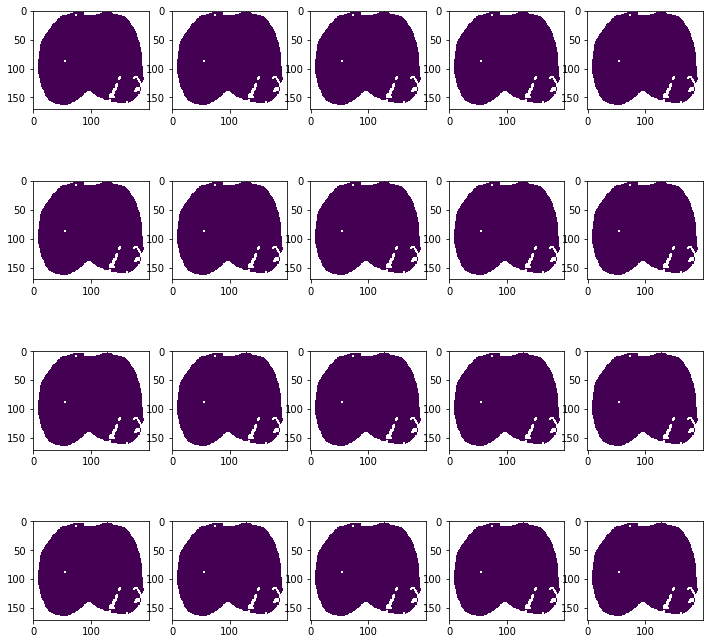

In [ ]:
# This code displays pattern id 9.

fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 4
pattern_id = 9
for i in range(1, columns*rows+1):
    motif_matrix = matrix_w[:,pattern_id,i-1]
    for j in range(len(motif_matrix)):
      if j not in non_nan_pos_list:
        motif_matrix[j] = np.nan
    img = reshape_img(motif_matrix)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
# plt.show()
plt.savefig("/content/drive/MyDrive/Research/Liu Lab/motif_8kdata/motif9.png")

In [ ]:
# This function aims to calculate which pattern is more active(in sum)
# This function is not quite accurate because the sum might not be a good evaluation of pattern active.

def cal_freq(matrix_h):
  result = np.zeros(len(matrix_h))
  for i in range(len(matrix_h)):
    print(matrix_h[i].shape)
    print(np.mean(matrix_h[i]))
    result[i] = np.sum([matrix_h[i]>0.001])
  
  return result

In [ ]:
# This function aims to reconstruct particular frame using the matrix W and matrix H

def reconstruct_img(matrix_w, matrix_h, frame):
  if frame < 20:
    print("please enter a frame > 20. THANKS!")
  motif_list, coef_list = [], []
  for i in range(10):
    for j in range(20):
      motif_list.append(matrix_w[:,i,j])
      coef_list.append(matrix_h[i, frame-j])
  motif_list = np.array(motif_list)
  coef_list = np.array(coef_list)
  print(motif_list.shape, coef_list.shape)
  return motif_list, coef_list

In [ ]:
# result = cal_freq(matrix_h)
# print(result)
# # print(matrix_h[0])

(200, 34200) (200,)
0.03549034796341178
0.0007398611326700174


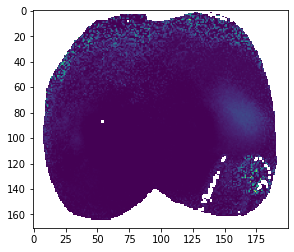

In [ ]:
# The following code displays the reconstructed frame 6000

motif_list, coef_list = reconstruct_img(matrix_w, matrix_h, 6000)
for i in range(len(motif_list)):
  motif_list[i] = motif_list[i]*coef_list[i]

# print(coef_list)
#print(matrix_h[:, 5980:6000])
print(np.max(motif_list))
reconstrcuted_data = np.mean(motif_list, axis = 0)

print(np.max(reconstrcuted_data))
for i in range(len(reconstrcuted_data)):
  if i not in non_nan_pos_list:
    reconstrcuted_data[i] = np.nan

reconstruct_img_frame = reshape_img(reconstrcuted_data)
plt.imshow(reconstruct_img_frame)

# print(image1000)
plt.show()

In [ ]:
# This code reads in the original 8000 frame in npy.
# In the original 8000 frame data, the background data are removed. So to display the frame we need to add the background back.

original_data_path_8k = 'part_data_8k.npy'
original_data_8k = np.load(original_data_path_8k)
print(original_data_8k.shape)

(25310, 8000)


In [ ]:
# Adding the background.

def transform_to_whole_img(short_array, non_nan_pos_list):
  short_array_index = 0
  result_array = np.zeros(34200)
  for i in range(len(result_array)):
    if i in non_nan_pos_list:
      result_array[i] = short_array[short_array_index]
      short_array_index = short_array_index + 1
    else:
      result_array[i] = np.nan

  return result_array

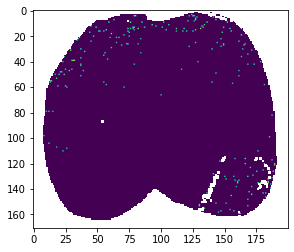

In [ ]:
# Displaying the original frame

original_image_frame = transform_to_whole_img(original_data_8k[:,6000], non_nan_pos_list)

original_image = reshape_img(original_image_frame)
plt.imshow(original_image)

# print(image1000)
plt.show()

In [ ]:
# If you want to calculate the similarity of two images you can use the cosine_similarity function.

# from sklearn.metrics.pairwise import cosine_similarity

# similarity = cosine_similarity(a, b)
# print(similarity)